## Discrete Bak Sneppen model

In the discrete Bak-Sneppen model [2], each node on a circle is given a fitness of either $0$ or $1$. Then a node with fitness zero is chosen uniformly at random. This node together with its two neighbors are replaced by three nodes,  each of which has a fitness $1$ with probability $p$ and $0$ with probability $1-p$. 

You can think of this model as if someone at work has Covid-19 😷️.
So they and their coworkers have to go home and be replaced by people who (unfortunately) may or may not have Covid-19.

## An example

For example, suppose initially the cycle looks like this.

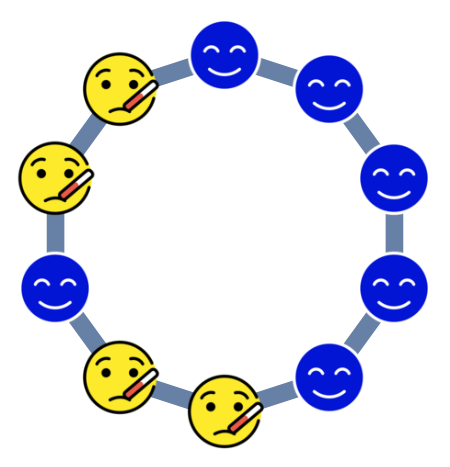

Then the node at the top together with its two neighbors are selected.

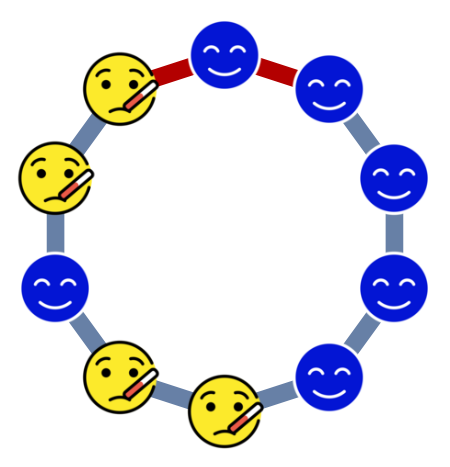

Three new nodes come to replace them, each with a random fitness. And the graph looks like this now.

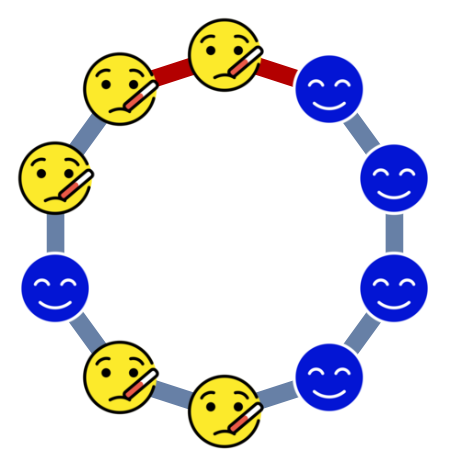

## A phase transition

It has been observed for a long time that if $p > 0.36$, then almost all nodes eventual will have fitness $1$. Otherwise we will always have some nodes with fitness $0$.

A [recent paper](https://arxiv.org/abs/2003.00222) by Stanislav Volkov [1] proved the first part for $p > 0.411$. 
For the second part an [old paper](https://www.semanticscholar.org/paper/Non-Triviality-of-a-Discrete-Bak%E2%80%93Sneppen-Evolution-Meester-Znamenski/050d3597f5412ad6c1e9043b2200aab4731fff27) [3] show that it is true for $p<p_c$ where $p_c$ is very small but non-zero constant. (No explicit bound on $p_c$ is given.) So the problem now is if this gap can actually be closed.

## Bak-Sneppen on positive integers with two replacement

It seems a bit difficult to actually prove the threshold exists for Bak-Sneppen. So I come up with a model that may be a slightly easier to analyze. 

It works as follows

1. Put a label 1 😀️ on all positive integers $\ge 2$. Put label 0 😷️ on integer $1$.
2. Choose an integer $u$ with label 0 uniformly at random. 
3. Change the label of this integer to 1 with probability $p$, and keep it as $0$ with probability $1-p$. 
4. Do the same for the for the integer $u+1$.
5. We say the process dies if there is no 0 integers left.

We call the difference between the largest and the smallest integer with a label 0  the _diameter_ of the process.

Here's my conjecture

1. If $p > 0.24$, then the process dies with probability $1$
2. If $p \in (0, 0.23)$, then the process has positive probability to run forever.

## Phase transition

In the simulation, if the process dies we just restart it.

In [1]:
ENV["GKS_ENCODING"]="utf8"
using Plots; using Pkg; Pkg.activate("..");
using Revise, BakSneppenSimulation

 Activating environment at `~/Dropbox/Research/2020/Bak-Sneppen/BakSneppenSimulation/Project.toml`


### The threshold

For $p<0.23$, the picture looks like this. As you can see, the diameter and number of zeros all goes up forever.

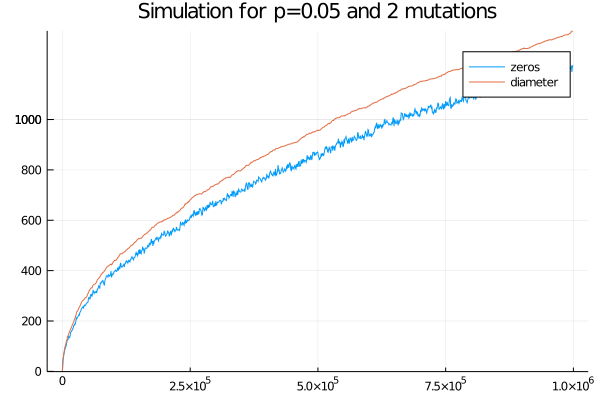

In [2]:
plotsim(simlinear(SimConfig(1000, 0.05, 2, 10^6)))

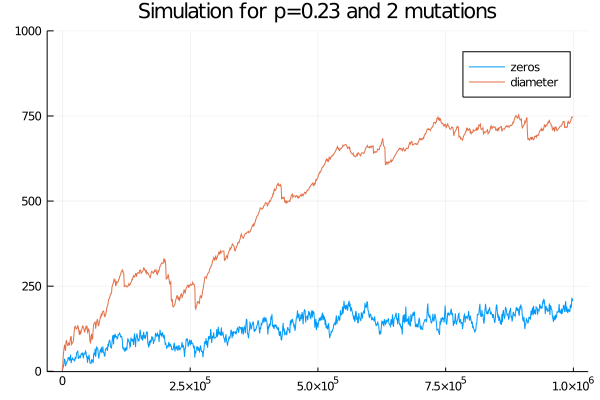

In [3]:
plotsim(simlinear(SimConfig(1000, 0.23, 2, 10^6)))

For $p=0.24$, it is clear that the process dies every time it starts

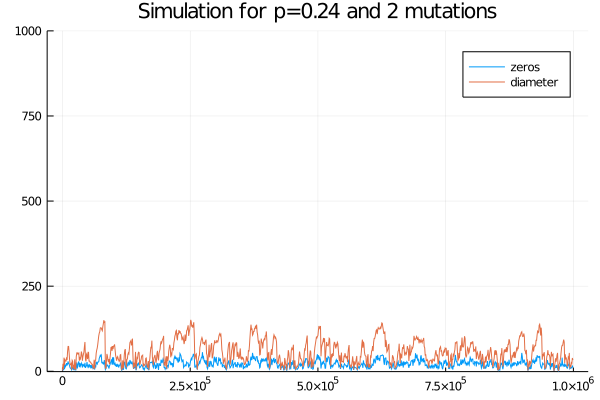

In [4]:
plotsim(simlinear(SimConfig(1000, 0.24, 2, 10^6)))

### The percentage of zeros

Another interesting things to notice is that the percentage of zeros seems to be stable when $p$ is small. My guess is that the percentage of $0$ should be around $1-2 p$. This is because if we assume that the positions of $0$ and $1$ are uniformly at random between the first and the last $0$'s (which they are not), then with $1-2 p$ percentage of $0$ will make the expected change int number of $0$ zero.

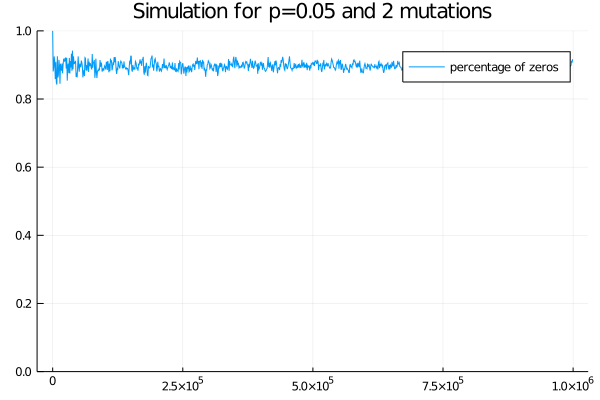

In [5]:
plotzero(simlinear(SimConfig(1000, 0.05, 2, 10^6)))

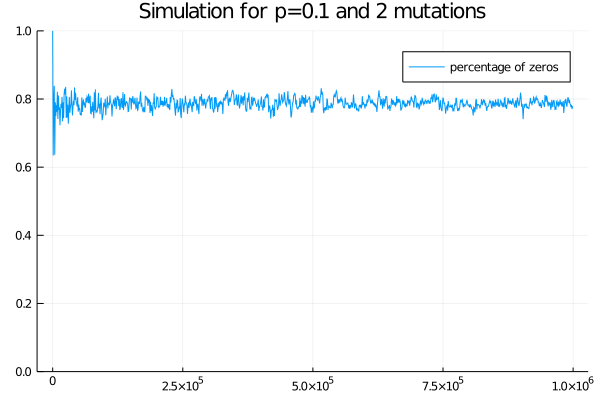

In [12]:
plotzero(simlinear(SimConfig(1000, 0.1, 2, 10^6)))

## A generalization

More generally, we can play with parameters $l$ and $r$, which are the number of neighbors on the left/right which are replaced together with the chosen 0.
So the model above corresponds to $l=0$ and $r=1$.

Simulation seems to suggest that as long as $r \ge 1$, there is always a threshold.

### $l=1$ and $r=1$

If we let $l=1$ and $r=1$, then not surprisingly we get the same threshold as $0.36$ as in the original circular model.

$p=0.35$

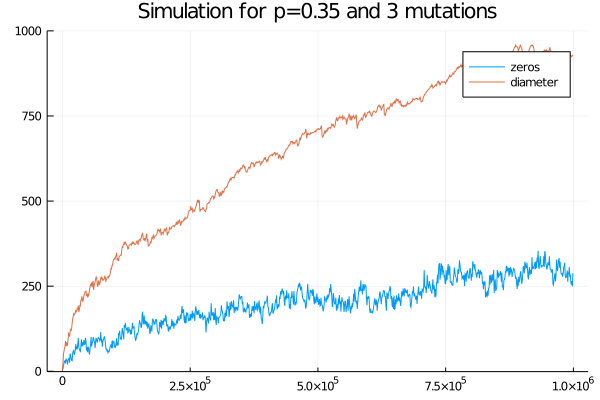

In [7]:
plotsim(simlinear(SimConfig(1000, 0.35, 3, 10^6)))

$p=0.36$

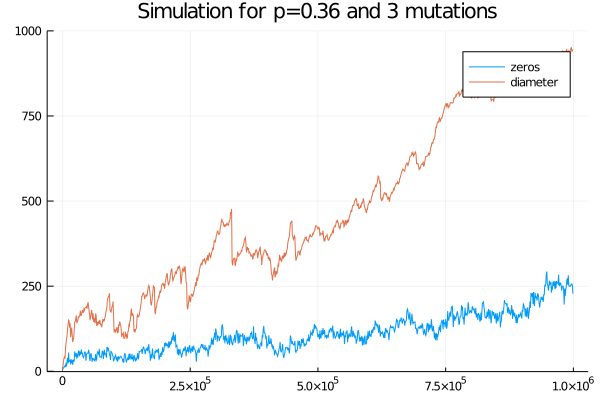

In [8]:
plotsim(simlinear(SimConfig(1000, 0.36, 3, 10^6)))

$p=0.37$

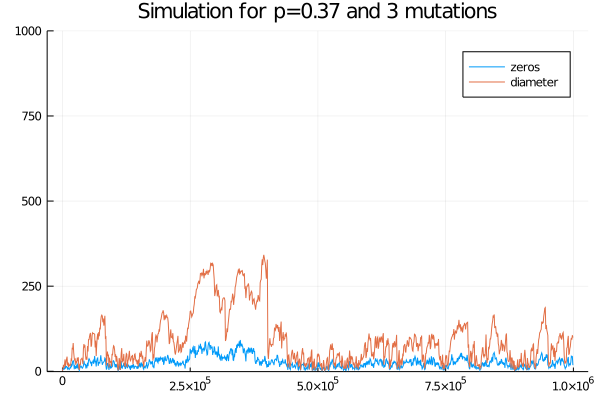

In [9]:
plotsim(simlinear(SimConfig(1000, 0.37, 3, 10^6)))

### $l=1$ and $r=2$

In this case, there seems to exist a threshold around $0.48$. That means the larger the $l$, the more likely for it to survive.

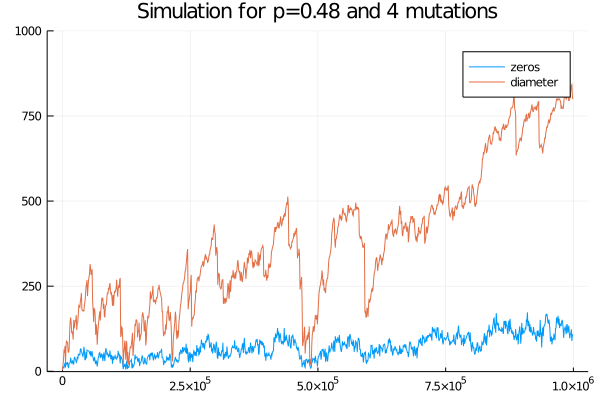

In [10]:
plotsim(simlinear(SimConfig(1000, 0.48, 4, 10^6)))

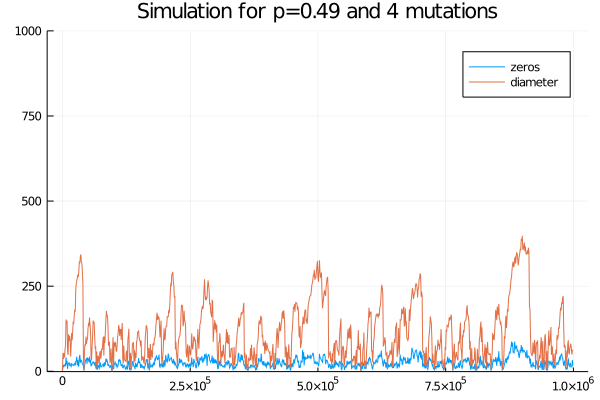

In [11]:
plotsim(simlinear(SimConfig(1000, 0.49, 4, 10^6)))

### Reference

[1] S. Volkov, “Rigorous upper bound for the discrete Bak-Sneppen model,” arXiv:2003.00222 [math], Feb. 2020 [Online]. Available: http://arxiv.org/abs/2003.00222. [Accessed: 23-Apr-2020]

[2] J. Barbay and C. Kenyon, “On the discrete Bak-Sneppen model of self-organized criticality,” in Proceedings of the twelfth annual ACM-SIAM symposium on Discrete algorithms, Washington, D.C., USA, 2001, pp. 928–933. 

[3]R. Meester and D. Znamenski, “Non-triviality of a discrete Bak-Sneppen evolution model,” arXiv:cond-mat/0301480, Jan. 2003 [Online]. Available: http://arxiv.org/abs/cond-mat/0301480. [Accessed: 24-Apr-2020]